<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis with Sklearn Dataset

## 1. Linear Regression on 1D Data

In [1]:

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Prepare 1D data
X_1d = X[:, 0].reshape(-1, 1)

# Split data
X_train_1d, X_test_1d, y_train, y_test = train_test_split(X_1d, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg_1d = LinearRegression()
lin_reg_1d.fit(X_train_1d, y_train)
y_pred_1d = lin_reg_1d.predict(X_test_1d)
rmse_1d = np.sqrt(mean_squared_error(y_test, y_pred_1d))
r2_1d = r2_score(y_test, y_pred_1d)

print("1D Linear Regression")
print("RMSE:", rmse_1d)
print("R2 Score:", r2_1d)


1D Linear Regression
RMSE: 72.48608125865272
R2 Score: 0.008289640305771506


## 2. Multiple Linear Regression

In [2]:

# Multiple Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)
y_pred_multi = lin_reg_multi.predict(X_test)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
r2_multi = r2_score(y_test, y_pred_multi)

print("Multiple Linear Regression")
print("RMSE:", rmse_multi)
print("R2 Score:", r2_multi)


Multiple Linear Regression
RMSE: 53.85344583676593
R2 Score: 0.4526027629719195


## 3. Polynomial Regression on 1D Data

In [3]:

from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_1d)
X_test_poly = poly_features.transform(X_test_1d)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly_1d = poly_reg.predict(X_test_poly)
rmse_poly_1d = np.sqrt(mean_squared_error(y_test, y_pred_poly_1d))
r2_poly_1d = r2_score(y_test, y_pred_poly_1d)

print("Polynomial Regression on 1D Data")
print("RMSE:", rmse_poly_1d)
print("R2 Score:", r2_poly_1d)


Polynomial Regression on 1D Data
RMSE: 72.6043458274433
R2 Score: 0.005050953003207237


## 4. Polynomial Regression on Multiple Data

In [4]:

# Polynomial Regression on Multiple Data
X_train_poly_multi = poly_features.fit_transform(X_train)
X_test_poly_multi = poly_features.transform(X_test)
poly_reg_multi = LinearRegression()
poly_reg_multi.fit(X_train_poly_multi, y_train)
y_pred_poly_multi = poly_reg_multi.predict(X_test_poly_multi)
rmse_poly_multi = np.sqrt(mean_squared_error(y_test, y_pred_poly_multi))
r2_poly_multi = r2_score(y_test, y_pred_poly_multi)

print("Polynomial Regression on Multiple Data")
print("RMSE:", rmse_poly_multi)
print("R2 Score:", r2_poly_multi)


Polynomial Regression on Multiple Data
RMSE: 55.641965344012206
R2 Score: 0.4156399336408033


## 5. Logistic Regression

In [7]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression with Sigmoid
y_binary = (y > np.median(y)).astype(int)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_binary, test_size=0.2, random_state=42)
log_reg_sigmoid = LogisticRegression()
log_reg_sigmoid.fit(X_train_log, y_train_log)
y_pred_log = log_reg_sigmoid.predict(X_test_log)
report_sigmoid = classification_report(y_test_log, y_pred_log)

print("Logistic Regression (Sigmoid Function)")
print(report_sigmoid)


Logistic Regression (Sigmoid Function)
              precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.71      0.72      0.72        40

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


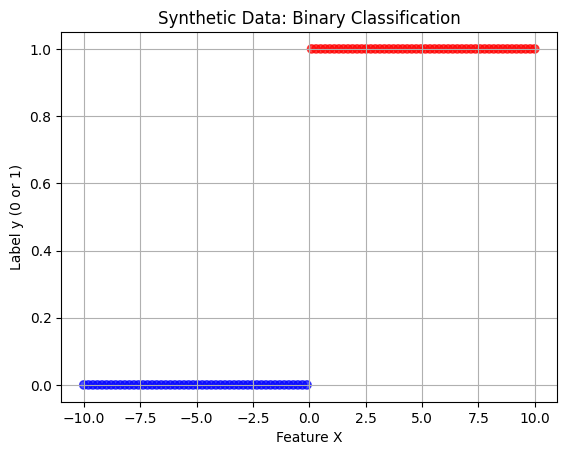

In [9]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-10, 10, 100).reshape(-1, 1)  # One-dimensional data
y = (X > 0).astype(int).ravel()  # Binary labels: 0 for negative, 1 for positive

# Visualize the data
plt.scatter(X, y, c=y, cmap='bwr', alpha=0.7)
plt.title("Synthetic Data: Binary Classification")
plt.xlabel("Feature X")
plt.ylabel("Label y (0 or 1)")
plt.grid()
plt.show()


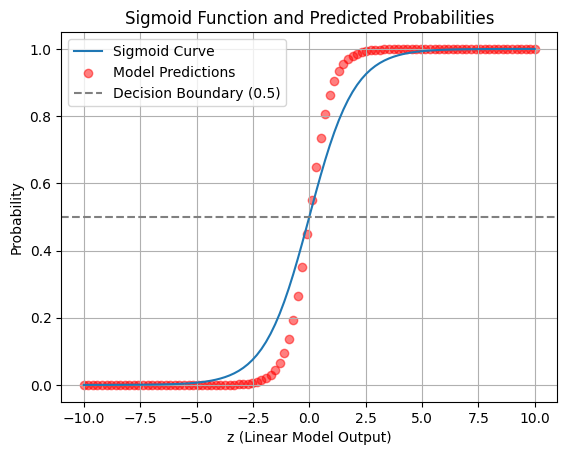

In [10]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Predict probabilities
z = np.linspace(-10, 10, 100)
probabilities = sigmoid(z)

# Visualize the sigmoid function
plt.plot(z, probabilities, label="Sigmoid Curve")
plt.scatter(X, log_reg.predict_proba(X)[:, 1], color='red', label="Model Predictions", alpha=0.5)
plt.title("Sigmoid Function and Predicted Probabilities")
plt.xlabel("z (Linear Model Output)")
plt.ylabel("Probability")
plt.axhline(0.5, color='gray', linestyle='--', label="Decision Boundary (0.5)")
plt.legend()
plt.grid()
plt.show()


RMSE: 54.332408273184846
R2 Score: 0.4428225673999313
Global Feature Importance (Summary Plot):


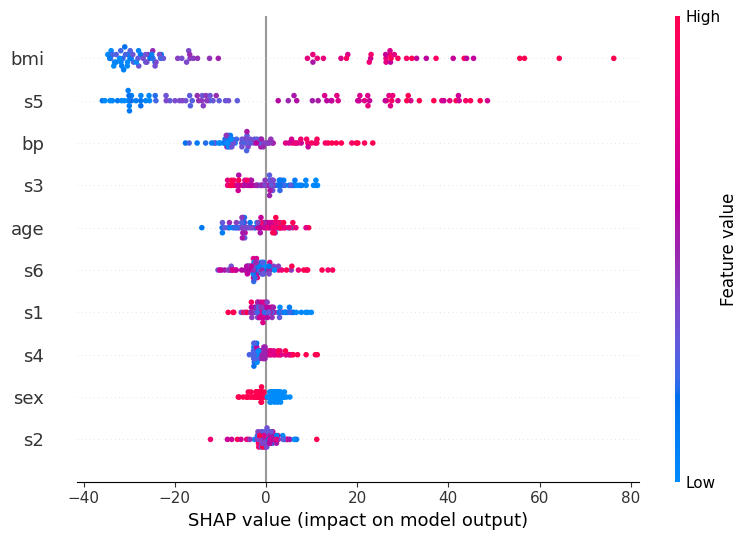

Individual Prediction Explanation (Force Plot):


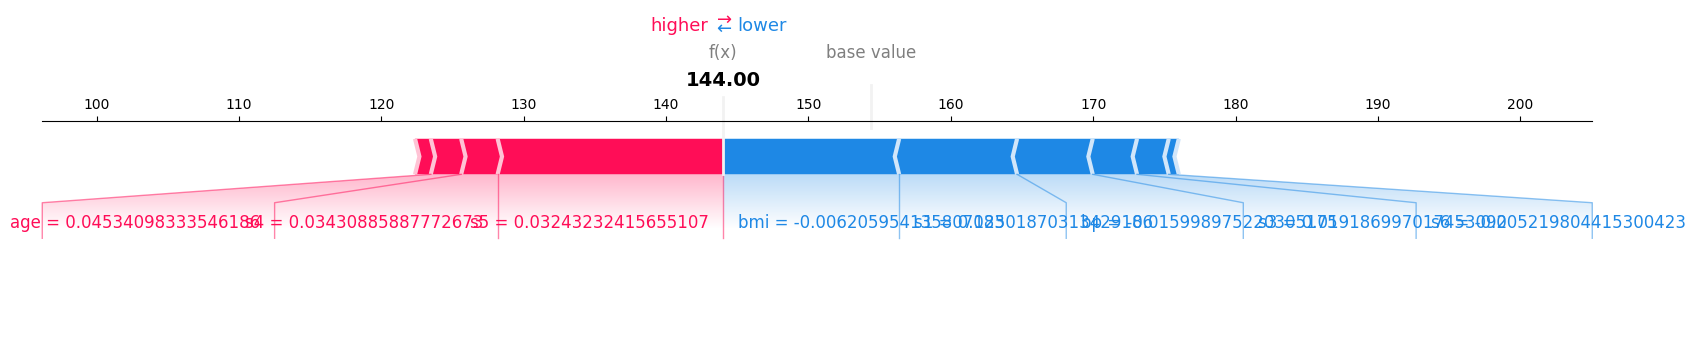

Feature Interaction Analysis (Dependence Plot):


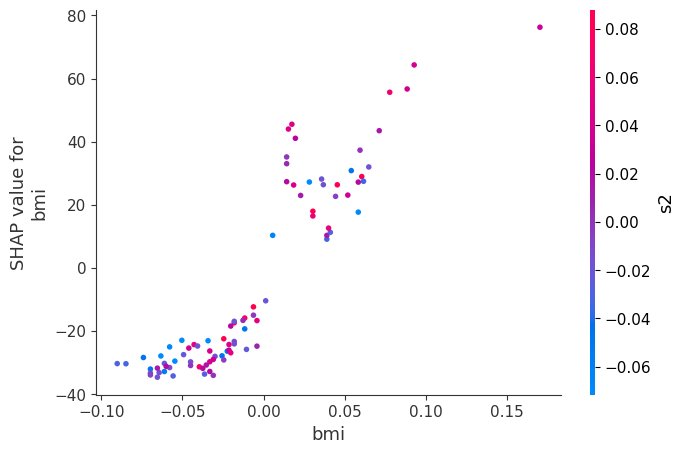

Global Feature Importance (Bar Plot):


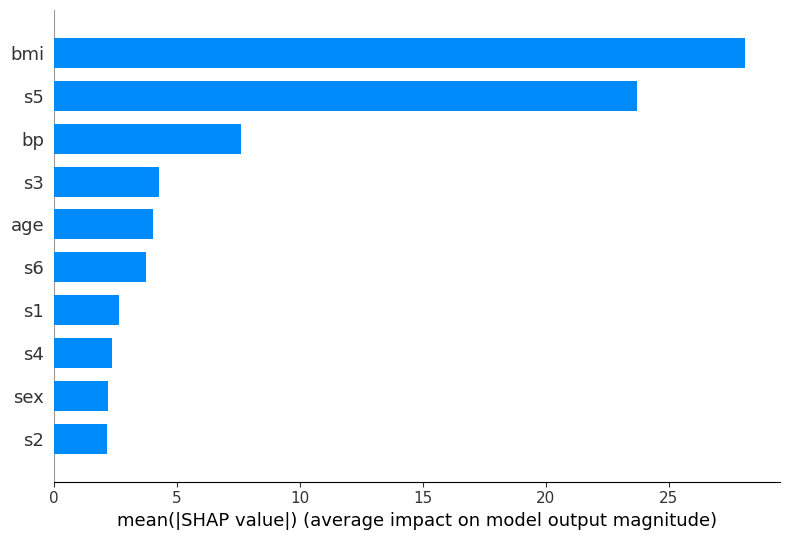

Detailed Breakdown of a Single Prediction (Waterfall Plot):


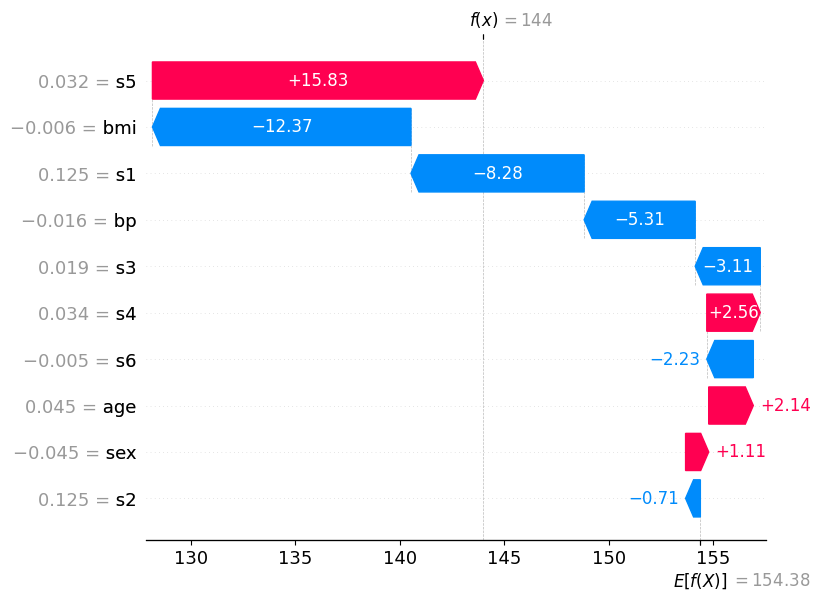

In [18]:
import shap
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# SHAP explanation using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 1. Visualize Feature Importance (Global Summary)
print("Global Feature Importance (Summary Plot):")
shap.summary_plot(shap_values, X_test)

# 2. Visualize Individual Sample Explanation (Force Plot)
print("Individual Prediction Explanation (Force Plot):")
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True)

# 3. Dependence Plot (Interaction Analysis for a Single Feature)
print("Feature Interaction Analysis (Dependence Plot):")
shap.dependence_plot('bmi', shap_values, X_test)

# 4. Feature Importance Bar Plot (Global Explanation)
print("Global Feature Importance (Bar Plot):")
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 5. Waterfall Plot (Detailed Breakdown of a Single Prediction)
print("Detailed Breakdown of a Single Prediction (Waterfall Plot):")
shap.waterfall_plot(shap.Explanation(values=shap_values[0],
                                     base_values=explainer.expected_value,
                                     data=X_test.iloc[0],
                                     feature_names=X_test.columns))
